<a href="https://colab.research.google.com/github/DandyWahyu/Machine_Learning/blob/main/Jobsheet4/Jobsheet4_TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Tugas Jobsheet 4

##1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [2]:
# Langkah 1: Muat data dari file CSV

import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Akurasi: 0.9763406940063092
              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
 [[293   4]
 [ 11 326]]


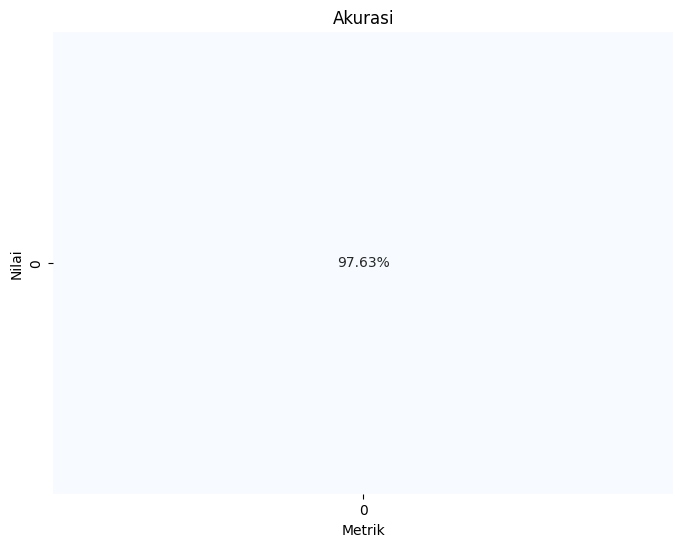

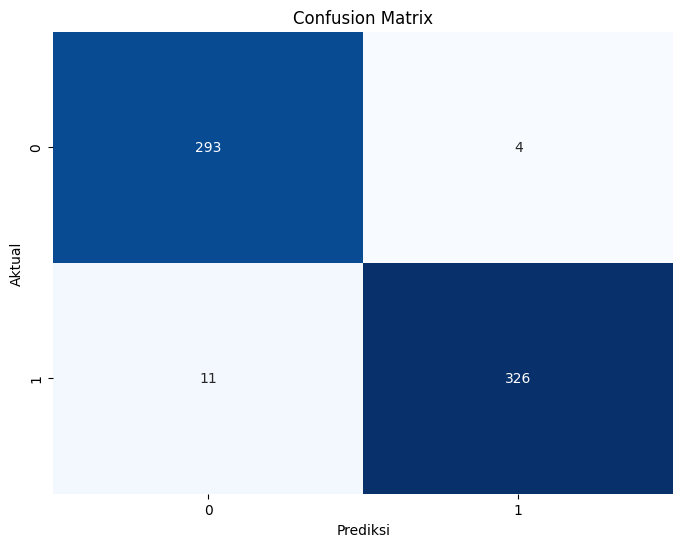

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pisahkan fitur dan label
X = data.drop('label', axis=1)  # Fitur
y = data['label']              # Label

# Bagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan Fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi Model SVM
svm_classifier = SVC(kernel='linear', C=1)

# Latih Model SVM
svm_classifier.fit(X_train, y_train)

# Evaluasi Model
y_pred = svm_classifier.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Report Klasifikasi
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

##2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur CountVectorizer dengan mengaktifkan stop_words
3. Evaluasi hasilnya

Akurasi: 0.9838565022421525
Laporan Klasifikasi:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[959   6]
 [ 12 138]]


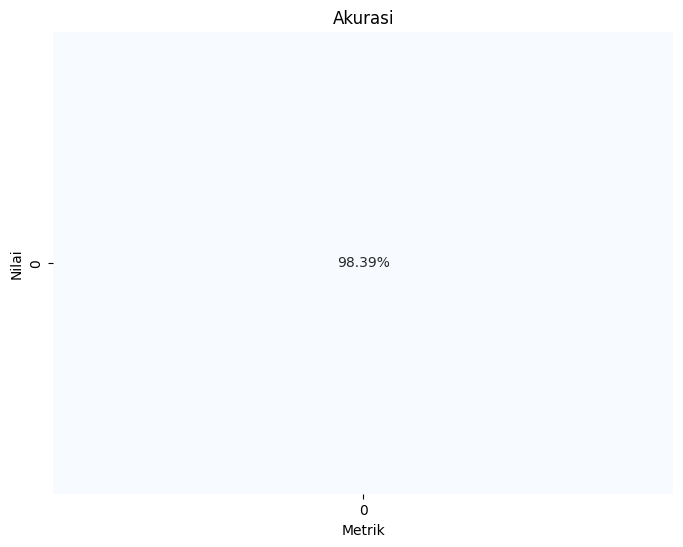

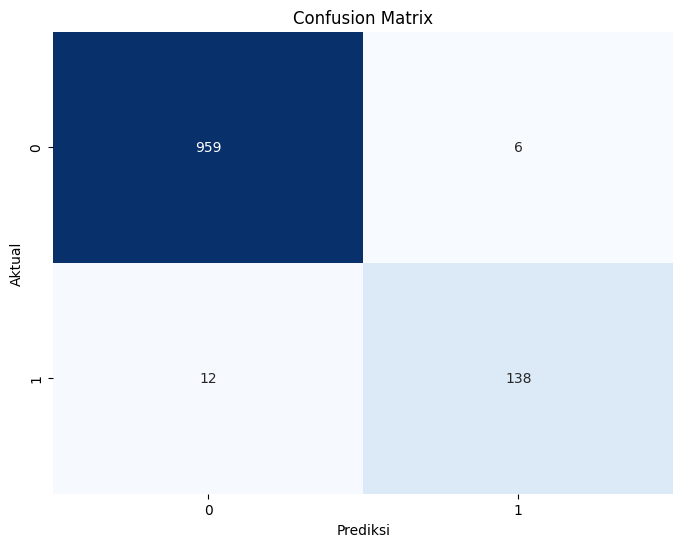

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Muat data spam.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding='latin-1')

# Bagi data menjadi data latih dan data uji
X = df['v2']
y = df['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Inisialisasi model klasifikasi Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Latih model
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi hasilnya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan Klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

##3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur TF-IDF dengan mengaktifkan stop_words
3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Preprocessing data (bersihkan kolom-kolom yang tidak diperlukan)
df = df[['v1', 'v2']]
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Bagi data menjadi data latih dan data uji
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi TF-IDF Vectorizer dengan stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inisialisasi model Multinomial Naive Bayes
naive_bayes = MultinomialNB()

# Latih model pada data pelatihan
naive_bayes.fit(X_train_tfidf, y_train)

# Prediksi label pada data pengujian
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Akurasi: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [7]:
# Lakukan langkah-langkah pemodelan dengan CountVectorizer seperti yang telah Anda lakukan pada Tugas no 2
# Hitung akurasi, matriks kebingungan, dan laporan klasifikasi

# Contoh:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi CountVectorizer dan model Multinomial Naive Bayes
count_vectorizer = CountVectorizer(stop_words='english')
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
naive_bayes_count = MultinomialNB()
naive_bayes_count.fit(X_train_count, y_train)
y_pred_count = naive_bayes_count.predict(X_test_count)

# Evaluasi hasil
accuracy_count = accuracy_score(y_test, y_pred_count)
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
class_report_count = classification_report(y_test, y_pred_count)

# Tampilkan hasil
print("Evaluasi dengan CountVectorizer:")
print("Akurasi:", accuracy_count)
print("Confusion Matrix:\n", conf_matrix_count)
print("Classification Report:\n", class_report_count)

Evaluasi dengan CountVectorizer:
Akurasi: 0.9838565022421525
Confusion Matrix:
 [[959   6]
 [ 12 138]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#### Perbandingan:
Fitur CountVectorizer dengan mengaktifkan stop words lebih sederhana dan hanya menghitung frekuensi kemunculan kata dalam dokumen.
*Fitur TF-IDF dengan mengaktifkan stop words memberikan bobot yang lebih besar pada kata-kata yang relatif jarang muncul dalam dokumen tetapi muncul dalam beberapa dokumen, sehingga dapat membantu menangkap kata-kata yang lebih informatif.

####Kesimpulan
1. Jika data memiliki banyak kata-kata yang muncul dalam berbagai dokumen tetapi tidak informatif (misalnya, stop words), CountVectorizer dengan mengaktifkan stop words dapat cukup efektif.
2. Jika Anda ingin memberikan bobot lebih besar pada kata-kata yang jarang muncul tetapi informatif, TF-IDF dapat lebih baik.